In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/trmyi/Desktop/AI_class/project/house_prediction/'
#https://data.gov.tw/dataset/137371 READ DESCRIPTIONS OF COLUMNS
df = pd.read_csv(path+'不動產實價登錄資訊-買賣案件-101年.csv')

In [3]:
df.head(2)

,district,rps01,rps02,rps03,rps04,rps05,rps06,rps07,rps08,rps09,...,rps18,rps19,rps20,rps21,rps22,rps23,rps24,rps25,rps26,rps27
0,中和區,房地(土地+建物),新北市中和區中安街40巷1~30號,12.54,住,NaN,NaN,1010518.0,土地2建物1車位0,六層,...,2.0,有,有,13900000.0,155047.0,NaN,0.0,0.0,地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或權利人自行提供...,RPOPMLOJKHIFFHF87CA
1,新店區,房地(土地+建物),新北市新店區玫瑰路58巷1~30號,33.32,住,NaN,NaN,1010711.0,土地3建物1車位0,四層,...,2.0,有,有,5000000.0,48445.0,NaN,0.0,0.0,NaN,RPROMLMLQHHFFCF28EA


In [4]:
import re

description = 'district(鄉鎮市區)、rps01(交易標的)、rps02(土地區段位置建物區段門牌)、rps03(土地移轉總面積平方公尺)、rps04(都市土地使用分區)、rps05(非都市土地使用分區)、rps06(非都市土地使用編定)、rps07(交易年月日)、rps08(交易筆棟數)、rps09(移轉層次)、rps10(總樓層數)、rps11(建物型態)、rps12(主要用途)、rps13(主要建材)、rps14(建築完成年月)、rps15(建物移轉總面積平方公尺)、rps16(建物現況格局-房)、rps17(建物現況格局-廳)、rps18(建物現況格局-衛)、rps19(建物現況格局-隔間)、rps20(有無管理組織)、rps21(總價元)、rps22(單價元平方公尺)、rps23(車位類別)、rps24(車位移轉總面積平方公尺)、rps25(車位總價元)、rps26(備註)、rps27(編號)'
d_split = description.split('、')

d_list = []

for i in d_split:
    d_list.append(re.search(r'\((.*?)\)',i).group(1))
    
des1 = list(df.columns)

df1 = df.rename(columns={i:j for i,j in zip(des1,d_list)})

In [5]:
len(df1.columns)

28

In [6]:
col_to_delete_1 = ['土地區段位置建物區段門牌','交易年月日','移轉層次','總樓層數','建築完成年月','建物現況格局-隔間','單價元平方公尺','備註','編號']

In [7]:
df2 = df1.drop(columns=col_to_delete_1)
len(df2.columns)

19

In [8]:
df2.columns

Index(['鄉鎮市區', '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定',
       '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '有無管理組織', '總價元', '車位類別', '車位移轉總面積平方公尺', '車位總價元'],
      dtype='object')

In [9]:
des2 = list(df2.columns)
eng_des = ['District','Product_type','L_area','CityLandUsageType','NonCityLandUsageType',
             'NonCityLandUsage編定','PropertiesIncluded','PropertyType','MainUsage','MainMaterial',
            'B_area','Rooms','LivingR','BathR', 'Management','Price','ParkingType','ParkingArea',
            'ParkingAreaPrice']

In [10]:
len(eng_des)

19

In [11]:
df3 = df2.rename(columns={i:j for i,j in zip(des2,eng_des)})

In [12]:
df3.head(2)

,District,Product_type,L_area,CityLandUsageType,NonCityLandUsageType,NonCityLandUsage編定,PropertiesIncluded,PropertyType,MainUsage,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,ParkingType,ParkingArea,ParkingAreaPrice
0,中和區,房地(土地+建物),12.54,住,NaN,NaN,土地2建物1車位0,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,89.65,1.0,1.0,2.0,有,13900000.0,NaN,0.0,0.0
1,新店區,房地(土地+建物),33.32,住,NaN,NaN,土地3建物1車位0,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,103.21,3.0,2.0,2.0,有,5000000.0,NaN,0.0,0.0


In [13]:
df3.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'ParkingType', 'ParkingArea',
       'ParkingAreaPrice'],
      dtype='object')

In [14]:
#location_stats = df5['location'].value_counts(ascending=False)
district_stats = df3.District.value_counts(ascending=False)
district_stats

淡水區    2063
新莊區    1200
三峽區    1173
板橋區    1169
中和區    1045
汐止區     924
三重區     860
林口區     850
新店區     737
土城區     540
蘆洲區     440
樹林區     413
鶯歌區     329
永和區     322
五股區     205
八里區     202
三芝區     145
泰山區     128
深坑區      54
瑞芳區      44
萬里區      43
雙溪區      36
金山區      33
石門區      16
平溪區       5
貢寮區       5
石碇區       4
坪林區       1
Name: District, dtype: int64

In [15]:
len(district_stats[district_stats>30])

23

In [16]:
len(district_stats)

28

In [17]:
len(district_stats[district_stats<=30])

5

In [18]:
district_stats_less_than_30 = district_stats[district_stats<=30]
district_stats_less_than_30

石門區    16
平溪區     5
貢寮區     5
石碇區     4
坪林區     1
Name: District, dtype: int64

In [19]:
len(df3.District.unique())

28

In [20]:
df3.District = df3.District.apply(lambda x: 'other' if x in district_stats_less_than_30 else x)
len(df3.District.unique())

24

In [21]:
df3 = df3[~(df3['District'] == 'other')]

In [22]:
df3.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'ParkingType', 'ParkingArea',
       'ParkingAreaPrice'],
      dtype='object')

In [23]:
df3.Product_type.value_counts()

房地(土地+建物)       6190
房地(土地+建物)+車位    4818
土地              1505
車位               436
建物                 6
Name: Product_type, dtype: int64

In [24]:
df4 = df3[~((df3['Product_type'] == '車位') | (df3['Product_type'] == '土地'))]

In [25]:
df4.Product_type.value_counts()

房地(土地+建物)       6190
房地(土地+建物)+車位    4818
建物                 6
Name: Product_type, dtype: int64

In [90]:
df4[df4['CityLandUsageType'] == '住'].shape

(8362, 19)

In [26]:
df5 = df4[df4['CityLandUsageType'] == '住']

In [27]:
df4[df4['CityLandUsageType'] == '住'].shape

(8362, 19)

In [28]:
df5.MainUsage.value_counts()

住家用        6315
見其他登記事項    1607
商業用         112
住商用          50
國民住宅         28
工業用          12
見使用執照         8
停車空間          3
住工用           2
工商用           1
Name: MainUsage, dtype: int64

In [29]:
df6 = df5[(df5['MainUsage'] == '住家用') | (df5['MainUsage'] == '國民住宅')]
df6.MainUsage.value_counts()

住家用     6315
國民住宅      28
Name: MainUsage, dtype: int64

In [30]:
df6.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'ParkingType', 'ParkingArea',
       'ParkingAreaPrice'],
      dtype='object')

In [31]:
df6.NonCityLandUsageType.value_counts()

山坡地保育區    74
鄉村區       30
一般農業區      2
Name: NonCityLandUsageType, dtype: int64

In [32]:
df6[df6['NonCityLandUsageType'].notna()].index

Int64Index([  113,   123,   192,   196,   203,   288,   363,   402,   478,
              712,
            ...
            11498, 11556, 11610, 11886, 12017, 12019, 12487, 12623, 12936,
            12983],
           dtype='int64', length=106)

In [33]:
df7 = df6.drop(index=df6[df6['NonCityLandUsageType'].notna()].index)

In [34]:
df7['PropertyType'].value_counts()

住宅大樓(11層含以上有電梯)    3193
公寓(5樓含以下無電梯)       1755
華廈(10層含以下有電梯)       954
套房(1房1廳1衛)          193
透天厝                 110
店面(店鋪)               17
其他                   11
辦公商業大樓                3
工廠                    1
Name: PropertyType, dtype: int64

In [35]:
propery_to_delete = ['店面(店鋪)','其他','辦公商業大樓','工廠']

In [36]:
df7['PropertyType'] = df7['PropertyType'].apply(lambda x: 'other' if x in propery_to_delete else x)
df8 = df7[~(df7['PropertyType'] == 'other')]

In [37]:
df8['PropertyType'].value_counts()

住宅大樓(11層含以上有電梯)    3193
公寓(5樓含以下無電梯)       1755
華廈(10層含以下有電梯)       954
套房(1房1廳1衛)          193
透天厝                 110
Name: PropertyType, dtype: int64

In [38]:
re.search(r"(.*?)\(.*\)+", '住宅大樓(11層含以上有電梯)').group(1)

'住宅大樓'

In [39]:
'透天厝'.split('(')[0]

'透天厝'

In [40]:
df8['PropertyType'] = df8['PropertyType'].apply(lambda x: x.split('(')[0])

C:\Users\trmyi\AppData\Local\Temp\ipykernel_1048\2690953700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['PropertyType'] = df8['PropertyType'].apply(lambda x: x.split('(')[0])


In [41]:
df8['PropertyType'].value_counts()

住宅大樓    3193
公寓      1755
華廈       954
套房       193
透天厝      110
Name: PropertyType, dtype: int64

In [42]:
df8.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'ParkingType', 'ParkingArea',
       'ParkingAreaPrice'],
      dtype='object')

In [43]:
df8['MainMaterial'].value_counts()

鋼筋混凝土造      5697
加強磚造         293
鋼骨鋼筋混凝土造     118
見其他登記事項       73
鋼骨混凝土造        18
土造             3
磚造             3
Name: MainMaterial, dtype: int64

In [44]:
df8.head(2)

,District,Product_type,L_area,CityLandUsageType,NonCityLandUsageType,NonCityLandUsage編定,PropertiesIncluded,PropertyType,MainUsage,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,ParkingType,ParkingArea,ParkingAreaPrice
0,中和區,房地(土地+建物),12.54,住,NaN,NaN,土地2建物1車位0,住宅大樓,住家用,鋼筋混凝土造,89.65,1.0,1.0,2.0,有,13900000.0,NaN,0.0,0.0
1,新店區,房地(土地+建物),33.32,住,NaN,NaN,土地3建物1車位0,公寓,住家用,鋼筋混凝土造,103.21,3.0,2.0,2.0,有,5000000.0,NaN,0.0,0.0


In [45]:
cols_to_del_1 = ['Product_type','CityLandUsageType','NonCityLandUsageType','NonCityLandUsage編定',
                 'PropertiesIncluded','MainUsage','ParkingType','ParkingArea','ParkingAreaPrice']

In [46]:
df9 = df8.drop(columns=cols_to_del_1)

In [47]:
df9.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price'],
      dtype='object')

In [48]:
# look at numeric and categorical values separately 
df9_num = df9[['L_area','B_area','Rooms','LivingR','BathR','Price']]
df9_cat = df9[['District','PropertyType','MainMaterial','Management']]

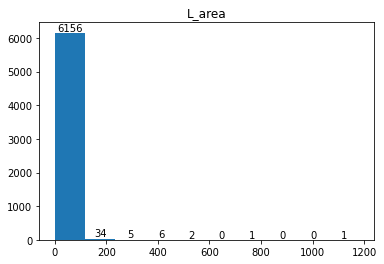

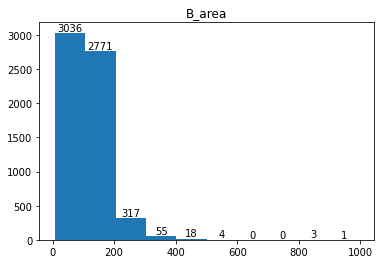

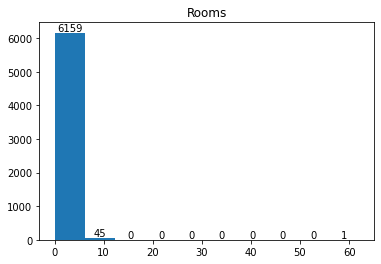

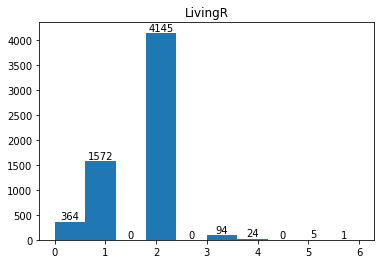

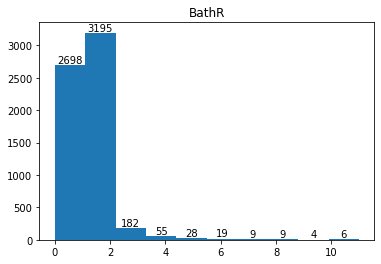

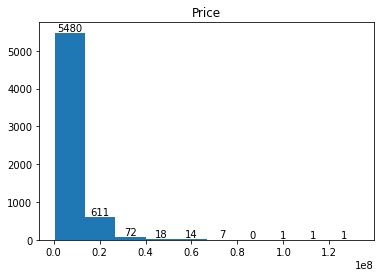

In [49]:
import matplotlib.pyplot as plt

for i in df9_num.columns:
    counts, edges, bars = plt.hist(df9_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [50]:
df9.Price.describe()

count    6.205000e+03
mean     8.845976e+06
std      6.630725e+06
min      4.000000e+05
25%      5.450000e+06
50%      7.550000e+06
75%      1.030000e+07
max      1.328800e+08
Name: Price, dtype: float64

In [53]:
'''def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape'''

"def remove_price_outliers(df):\n    df_out = pd.DataFrame()\n    for key, subdf in df.groupby('location'):\n        m = np.mean(subdf.price_per_sqft)\n        st = np.std(subdf.price_per_sqft)\n        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]\n        df_out = pd.concat([df_out,reduced_df],ignore_index=True)\n    return df_out\ndf7 = remove_pps_outliers(df6)\ndf7.shape"

In [54]:
df_test = df9.copy()
df_test['price_per_area'] = df_test['Price']/df_test['B_area']
df_test['price_per_area'].head()

0    155047.406581
1     48444.918128
2     78125.000000
5     44516.558496
6     96623.270952
Name: price_per_area, dtype: float64

In [55]:
df_test['price_per_area'].describe()

count      6205.000000
mean      76110.929597
std       29634.838109
min       11607.340261
25%       53263.171405
50%       72111.051019
75%       94065.934066
max      244010.647737
Name: price_per_area, dtype: float64

In [56]:
import numpy as np

def remove_ppa_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('District'):
        m = np.mean(subdf.price_per_area)
        st = np.std(subdf.price_per_area)
        reduced_df = subdf[(subdf.price_per_area>(m-st)) & (subdf.price_per_area<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [57]:
df_test1 = remove_ppa_outliers(df_test)
df_test1.shape

(4513, 11)

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


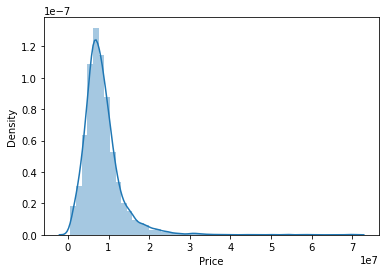

In [58]:
import seaborn as sns

#histogram
sns.distplot(df_test1['Price']);

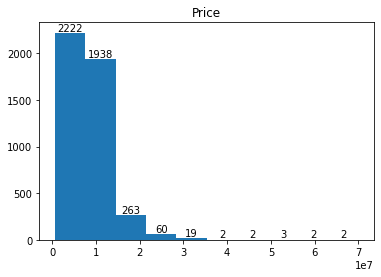

In [59]:
counts, edges, bars = plt.hist(df_test1['Price'])
plt.bar_label(bars)
plt.title(i)
plt.show()

In [60]:
df_test1[df_test1['Price']>50000000]

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
333,三重區,67.95,住宅大樓,鋼筋混凝土造,564.64,0.0,0.0,0.0,有,60000000.0,106262.397280
355,三重區,66.98,住宅大樓,鋼筋混凝土造,465.49,0.0,0.0,0.0,有,53750000.0,115469.720080
383,三重區,68.20,住宅大樓,鋼筋混凝土造,566.03,0.0,0.0,0.0,有,58000000.0,102468.067064
464,三重區,67.15,住宅大樓,鋼筋混凝土造,466.46,0.0,0.0,0.0,有,54000000.0,115765.553316
1223,新店區,120.04,華廈,鋼筋混凝土造,822.94,0.0,0.0,0.0,有,70140000.0,85231.001045
1224,新店區,120.04,華廈,鋼筋混凝土造,800.74,0.0,0.0,0.0,有,69160000.0,86370.107650


In [61]:
df_test1 = df_test1.drop(df_test1[df_test1['Rooms'] == 0].index)

In [62]:
df_test1[(df_test1['Rooms'])<(df_test1['BathR'])]

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
279,三重區,54.59,透天厝,加強磚造,151.20,3.0,5.0,4.0,無,17200000.0,113756.613757
680,中和區,36.21,住宅大樓,鋼筋混凝土造,410.86,5.0,3.0,6.0,有,37300000.0,90785.182301
1495,新莊區,16.09,華廈,鋼筋混凝土造,108.99,1.0,1.0,2.0,有,8500000.0,77988.806313
2318,板橋區,33.60,公寓,鋼筋混凝土造,98.84,1.0,1.0,2.0,無,12000000.0,121408.336706
2409,林口區,96.01,透天厝,鋼筋混凝土造,281.27,3.0,4.0,4.0,有,16800000.0,59729.085932
2524,樹林區,16.09,公寓,鋼筋混凝土造,49.50,3.0,1.0,4.0,無,3400000.0,68686.868687
2551,樹林區,23.93,公寓,鋼筋混凝土造,101.39,1.0,2.0,2.0,無,5800000.0,57204.852550
2610,永和區,30.40,公寓,鋼筋混凝土造,95.58,1.0,2.0,2.0,無,9600000.0,100439.422473
3240,淡水區,167.48,透天厝,鋼筋混凝土造,270.77,3.0,3.0,4.0,無,15680000.0,57908.926395
3281,淡水區,34.27,住宅大樓,鋼筋混凝土造,241.31,1.0,2.0,2.0,有,15500000.0,64232.729684


In [63]:
df_test1[(df_test1['Rooms'])<(df_test1['BathR'])]

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
279,三重區,54.59,透天厝,加強磚造,151.20,3.0,5.0,4.0,無,17200000.0,113756.613757
680,中和區,36.21,住宅大樓,鋼筋混凝土造,410.86,5.0,3.0,6.0,有,37300000.0,90785.182301
1495,新莊區,16.09,華廈,鋼筋混凝土造,108.99,1.0,1.0,2.0,有,8500000.0,77988.806313
2318,板橋區,33.60,公寓,鋼筋混凝土造,98.84,1.0,1.0,2.0,無,12000000.0,121408.336706
2409,林口區,96.01,透天厝,鋼筋混凝土造,281.27,3.0,4.0,4.0,有,16800000.0,59729.085932
2524,樹林區,16.09,公寓,鋼筋混凝土造,49.50,3.0,1.0,4.0,無,3400000.0,68686.868687
2551,樹林區,23.93,公寓,鋼筋混凝土造,101.39,1.0,2.0,2.0,無,5800000.0,57204.852550
2610,永和區,30.40,公寓,鋼筋混凝土造,95.58,1.0,2.0,2.0,無,9600000.0,100439.422473
3240,淡水區,167.48,透天厝,鋼筋混凝土造,270.77,3.0,3.0,4.0,無,15680000.0,57908.926395
3281,淡水區,34.27,住宅大樓,鋼筋混凝土造,241.31,1.0,2.0,2.0,有,15500000.0,64232.729684


In [64]:
df_test1[(df_test1['LivingR'])>4]

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
279,三重區,54.59,透天厝,加強磚造,151.20,3.0,5.0,4.0,無,17200000.0,113756.613757
1368,新店區,36.85,公寓,加強磚造,110.44,6.0,6.0,6.0,無,10000000.0,90546.903296
1555,新莊區,41.39,公寓,鋼筋混凝土造,128.79,5.0,5.0,3.0,有,7800000.0,60563.708362
1909,板橋區,105.00,透天厝,加強磚造,225.33,5.0,5.0,3.0,無,18000000.0,79882.838504
2147,板橋區,36.30,公寓,鋼筋混凝土造,96.46,5.0,5.0,5.0,無,7500000.0,77752.436243


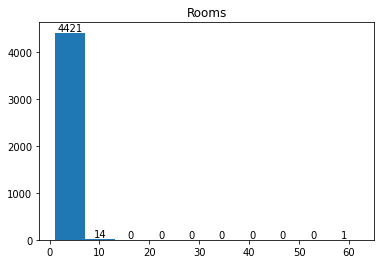

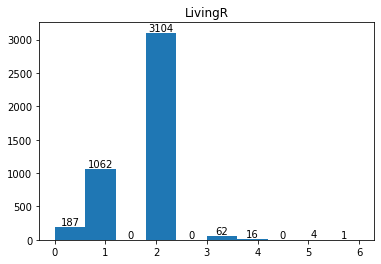

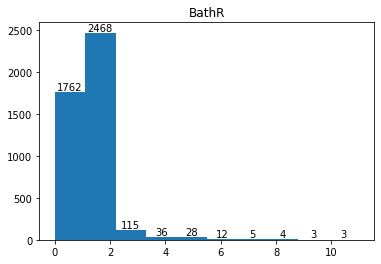

In [65]:
for i in ['Rooms','LivingR','BathR']:
    counts, edges, bars = plt.hist(df_test1[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [66]:
df10 = df9.copy()
df10['price_per_area'] = df10['Price']/df10['B_area']

In [67]:
df10 = remove_ppa_outliers(df10)
df10.shape

(4513, 11)

In [68]:
df11 = df10[df10['Price']<50000000]

In [69]:
df12 = df11[(df11['LivingR'])<4]

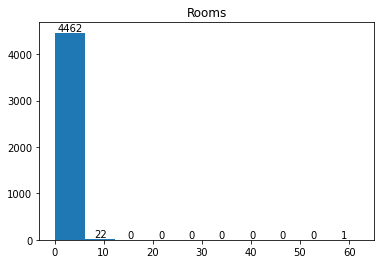

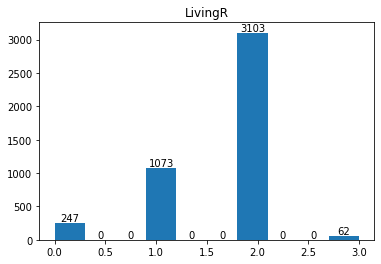

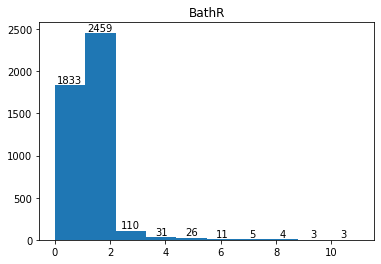

In [70]:
for i in ['Rooms','LivingR','BathR']:
    counts, edges, bars = plt.hist(df12[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [71]:
df12 = df12[df12['Rooms']<15]

In [72]:
df12.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'price_per_area'],
      dtype='object')

In [73]:
df12.Management.value_counts()

有    3041
無    1443
Name: Management, dtype: int64

In [74]:
df12['Management'] = df12["Management"].replace({"有": 1 ,"無": 2})

In [75]:
df12.head()

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
0,三峽區,25.04,住宅大樓,鋼筋混凝土造,195.33,4.0,2.0,2.0,1,11750000.0,60154.610147
1,三峽區,28.92,華廈,鋼筋混凝土造,131.60,3.0,2.0,2.0,1,6300000.0,47872.340426
2,三峽區,11.05,住宅大樓,鋼筋混凝土造,75.22,2.0,1.0,1.0,1,3850000.0,51183.195959
3,三峽區,41.99,華廈,鋼筋混凝土造,183.16,4.0,2.0,2.0,1,10800000.0,58964.839485
4,三峽區,27.10,住宅大樓,鋼筋混凝土造,186.50,3.0,2.0,2.0,1,11000000.0,58981.233244


In [76]:
df12['MainMaterial'].value_counts()

鋼筋混凝土造      4185
加強磚造         171
鋼骨鋼筋混凝土造      80
見其他登記事項       34
鋼骨混凝土造        11
磚造             2
土造             1
Name: MainMaterial, dtype: int64

In [77]:
df13 = df12[~(df12['MainMaterial']=='見其他登記事項')]

In [78]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        4450 non-null   object 
 1   L_area          4450 non-null   float64
 2   PropertyType    4450 non-null   object 
 3   MainMaterial    4450 non-null   object 
 4   B_area          4450 non-null   float64
 5   Rooms           4450 non-null   float64
 6   LivingR         4450 non-null   float64
 7   BathR           4450 non-null   float64
 8   Management      4450 non-null   int64  
 9   Price           4450 non-null   float64
 10  price_per_area  4450 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 417.2+ KB


In [79]:
df13.head()

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,price_per_area
0,三峽區,25.04,住宅大樓,鋼筋混凝土造,195.33,4.0,2.0,2.0,1,11750000.0,60154.610147
1,三峽區,28.92,華廈,鋼筋混凝土造,131.60,3.0,2.0,2.0,1,6300000.0,47872.340426
2,三峽區,11.05,住宅大樓,鋼筋混凝土造,75.22,2.0,1.0,1.0,1,3850000.0,51183.195959
3,三峽區,41.99,華廈,鋼筋混凝土造,183.16,4.0,2.0,2.0,1,10800000.0,58964.839485
4,三峽區,27.10,住宅大樓,鋼筋混凝土造,186.50,3.0,2.0,2.0,1,11000000.0,58981.233244


In [80]:
df13 = df13.drop(columns=['price_per_area'])

In [81]:
df13.to_csv('housepropertydata_rework_v1.csv')

In [82]:
df13.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price'],
      dtype='object')

In [83]:
df13_num = df13[['L_area','B_area','Rooms','LivingR','BathR','Price']]
df13_cat = df13[['District','PropertyType','MainMaterial','Management']]

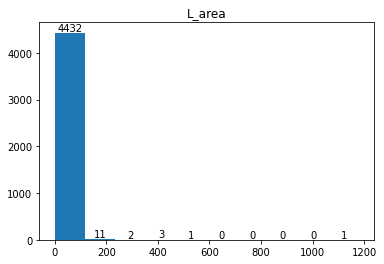

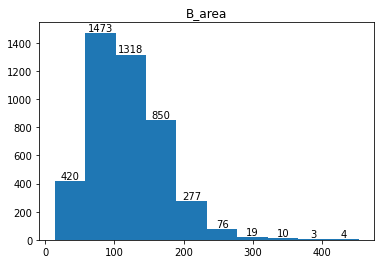

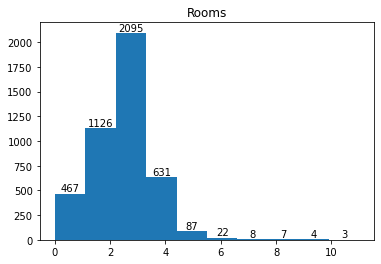

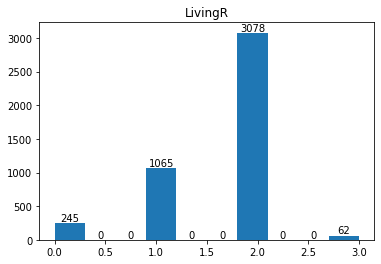

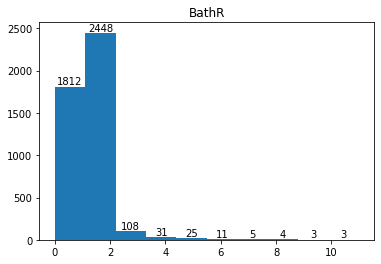

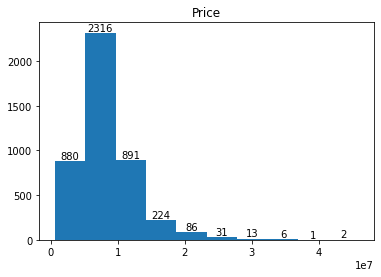

In [84]:
for i in df13_num.columns:
    counts, edges, bars = plt.hist(df13_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

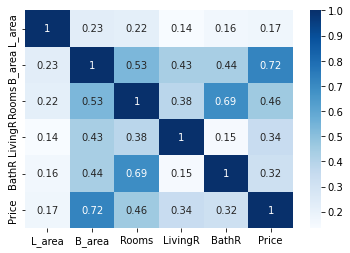

In [85]:
import seaborn as sns


sns.heatmap(df13_num.corr(),annot=True, cmap="Blues")
plt.show()

In [86]:
import warnings
warnings.filterwarnings('ignore')

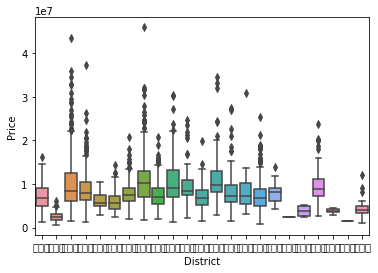

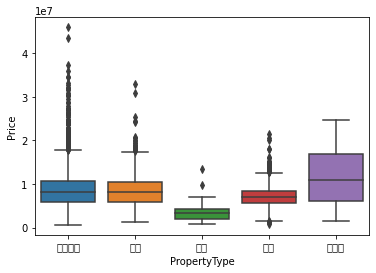

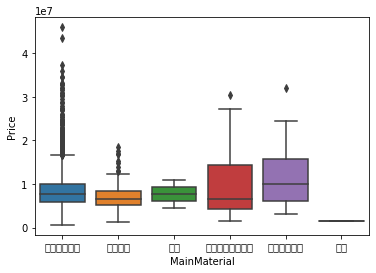

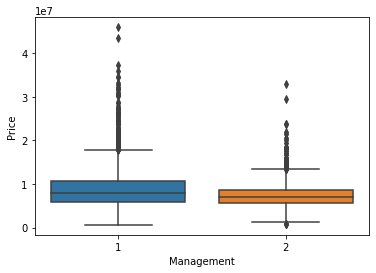

In [87]:
for i in df13_cat.columns:
    sns.boxplot(x=i, y="Price", data=df13[['Price',i]])
    plt.show()

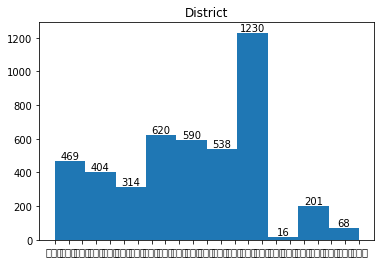

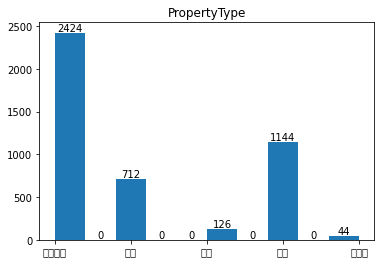

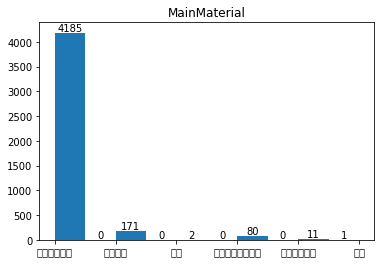

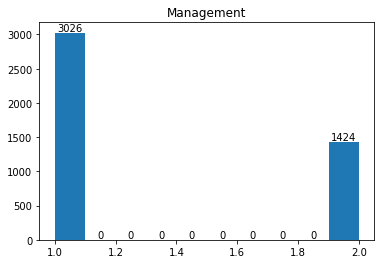

In [88]:
for i in df13_cat.columns:
    counts, edges, bars = plt.hist(df13_cat[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()